# K-Nearest Neighbour Model

## Importing libraries

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading in CSV data
Reading the dataset from a CSV into a DataFrame for use with the model.

In [164]:
music_df = pd.read_csv(r'D:\Uni\Y3\FYP\Code\Music Classification\extracted-features.csv')

# Read in CSV as a Pandas DataFrame
# print(music_df)
#Drop the TrackNum from the DataFrame (This is not important for classification)
music_df.drop('TrackNum', 1, inplace = True)
# Check the field has been dropped correctly
# print(music_df)

# This will contain the data
data = music_df.iloc[:, 1:5].values
# This will contain the labels corresponding to the data
labels = music_df.iloc[:, 0].values

## Produce KNN model

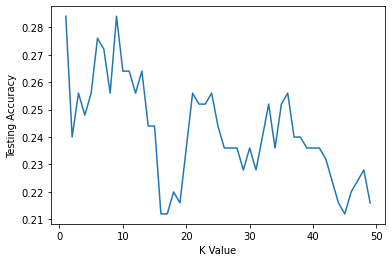

K value: 1 Testing Accuracy: 0.284
K value: 2 Testing Accuracy: 0.24
K value: 3 Testing Accuracy: 0.256
K value: 4 Testing Accuracy: 0.248
K value: 5 Testing Accuracy: 0.256
K value: 6 Testing Accuracy: 0.276
K value: 7 Testing Accuracy: 0.272
K value: 8 Testing Accuracy: 0.256
K value: 9 Testing Accuracy: 0.284
K value: 10 Testing Accuracy: 0.264
K value: 11 Testing Accuracy: 0.264
K value: 12 Testing Accuracy: 0.256
K value: 13 Testing Accuracy: 0.264
K value: 14 Testing Accuracy: 0.244
K value: 15 Testing Accuracy: 0.244
K value: 16 Testing Accuracy: 0.212
K value: 17 Testing Accuracy: 0.212
K value: 18 Testing Accuracy: 0.22
K value: 19 Testing Accuracy: 0.216
K value: 20 Testing Accuracy: 0.236
K value: 21 Testing Accuracy: 0.256
K value: 22 Testing Accuracy: 0.252
K value: 23 Testing Accuracy: 0.252
K value: 24 Testing Accuracy: 0.256
K value: 25 Testing Accuracy: 0.244
K value: 26 Testing Accuracy: 0.236
K value: 27 Testing Accuracy: 0.236
K value: 28 Testing Accuracy: 0.236
K v

In [165]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.25)

accuracy_scores_list = []
k_scores = []

for k in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(data_train, labels_train)
    y_pred = knn_model.predict(data_test)

    accuracy_scores_list.append(metrics.accuracy_score(labels_test, y_pred))



plt.plot(range(1, 50), accuracy_scores_list)
plt.xlabel("K Value")
plt.ylabel("Testing Accuracy")
plt.show()

for i in range(0, len(accuracy_scores_list)):
    print("K value: " + str(i + 1) + " Testing Accuracy: " + str(accuracy_scores_list[i]))

best_accuracy = max(accuracy_scores_list)
print("Best accuracy using k: " + str(accuracy_scores_list.index(best_accuracy) + 1) + " Accuracy: " + str(best_accuracy))